<a href="https://colab.research.google.com/github/jeonjnh/python_stock_backtest/blob/main/SP500_Back_Test_Update.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import yfinance as yf
import pandas as pd
from pandas.tseries.offsets import BMonthBegin, BDay
from datetime import date, timedelta
import matplotlib.pyplot as plt

In [2]:
# from Chat GPT
def get_monthly_first_business_day_data(ticker, start_date, end_date):
    try:
        # 애플 주식 데이터 가져오기
        stock_data = yf.download(ticker, start=start_date, end=end_date)

        # 매월 첫 번째 영업일의 날짜 가져오기
        first_business_days = pd.date_range(start=start_date, end=end_date, freq=BMonthBegin())

        # 주식 가격 데이터에서 해당 날짜의 종가 가져오기
        monthly_close_prices = []
        for date in first_business_days:
            # 해당 날짜가 데이터에 있는지 확인
            if date in stock_data.index:
                monthly_close_prices.append(stock_data.loc[date]['Adj Close'])
            else:
                # 데이터에 없는 경우 다음 영업일로 이동
                next_business_day = date + BDay(1)
                while next_business_day not in stock_data.index:
                    next_business_day += BDay(1)
                monthly_close_prices.append(stock_data.loc[next_business_day]['Adj Close'])

        return pd.Series(monthly_close_prices, index=first_business_days)

    except Exception as e:
        print(f"Error fetching data: {e}")
        return pd.Series([])  # 빈 Series를 반환하여 예외 발생 시 빈 데이터를 처리

# 사용 예시
# ticker = 'IE00B53SZB19'
# start_date = '2021-01-01'
# end_date = '2023-12-31'
# monthly_invest = 300

# monthly_close_prices = get_monthly_first_business_day_data(ticker, start_date, end_date)
"""
if not monthly_close_prices.empty:
    print(monthly_close_prices)
else:
    print("No data available for the specified period.")
"""

'\nif not monthly_close_prices.empty:\n    print(monthly_close_prices)\nelse:\n    print("No data available for the specified period.")\n'

In [3]:
"""
S&P 500 USD (Acc) 85.25 € Amundi ISIN LU1681049018
x  S&P 500 USD (Acc) 41.47 € HSBC ISIN IE000JZ473P7 -- 2022년부터
S&P 500 EUR Hedged (Acc) 100.59 € iShares ISIN IE00B3ZW0K18
S&P 500 EUR (Acc) 85,64 € Amundi LU1681048804
S&P 500 EUR (Acc) 310,75 € Amundi LU1135865084
S&P 500 EUR (Acc) 68,83 € Xtrackers IE00BM67HW99
x  S&P 500 EUR (Acc) 15,82 € BNP Paribas FR0013041530
S&P 500 Equal Weight USD (Acc) 76,34 € Xtrackers IE00BLNMYC90
Core S&P 500 USD (Acc) 462,07 € iShares IE00B5BMR087

"""
SP500_label = ['S&P 500 USD (Acc) 85.25 € Amundi ISIN LU1681049018',
               'S&P 500 EUR Hedged (Acc) 100.59 € iShares ISIN IE00B3ZW0K18',
               'S&P 500 EUR (Acc) 85,64 € Amundi LU1681048804',
               'S&P 500 EUR (Acc) 310,75 € Amundi LU1135865084',
               'S&P 500 EUR (Acc) 68,83 € Xtrackers IE00BM67HW99',
               'S&P 500 Equal Weight USD (Acc) 76,34 € Xtrackers IE00BLNMYC90',
               'Core S&P 500 USD (Acc) 462,07 € iShares IE00B5BMR087']

In [4]:
ticker = ['LU1681049018', 'IE00B3ZW0K18', 'LU1681048804', 'LU1135865084', 'IE00BM67HW99', 'IE00BLNMYC90', 'IE00B5BMR087']
start_date = '2015-01-01'
end_date = '2023-12-31'
monthly_invest = 300

df_all = pd.DataFrame()

for t in ticker:
  close_prices = get_monthly_first_business_day_data(t, start_date, end_date)
  if df_all.empty:
    df_all = pd.DataFrame({t: close_prices.values}, index=close_prices.index)
    df_all['invest'] = range(monthly_invest, monthly_invest *(len(df_all)+1), monthly_invest)
  else:
    df_all[t] = close_prices.values

  df_all[t+'_num'] = monthly_invest / df_all[t]
  df_all[t+'_cum_num'] = df_all[t+'_num'].cumsum()
  df_all[t+'_price'] = df_all[t+'_cum_num'] * df_all[t]
  df_all[t+'_ret'] = df_all[t+'_price'] - df_all['invest']



df_all.tail()

[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


,LU1681049018,invest,LU1681049018_num,LU1681049018_cum_num,LU1681049018_price,LU1681049018_ret,IE00B3ZW0K18,IE00B3ZW0K18_num,IE00B3ZW0K18_cum_num,IE00B3ZW0K18_price,...,IE00BLNMYC90,IE00BLNMYC90_num,IE00BLNMYC90_cum_num,IE00BLNMYC90_price,IE00BLNMYC90_ret,IE00B5BMR087,IE00B5BMR087_num,IE00B5BMR087_cum_num,IE00B5BMR087_price,IE00B5BMR087_ret
2023-08-01,88.248749,31200,3.399482,562.464066,49636.750047,18436.750047,96.959999,3.094059,492.467125,47749.612031,...,82.230003,3.648303,599.759457,49318.222144,18118.222144,434.929993,0.689766,127.327150,55378.396481,24178.396481
2023-09-01,87.198753,31500,3.440416,565.904482,49346.165353,17846.165353,95.665001,3.135943,495.603069,47411.868006,...,80.370003,3.732736,603.492193,48502.669188,17002.669188,436.619995,0.687096,128.014246,55893.579675,24393.579675
2023-10-02,83.129997,31800,3.608806,569.513288,47343.638037,15543.638037,90.910004,3.299967,498.903035,45355.276776,...,75.440002,3.976670,607.468863,45827.452494,14027.452494,427.339996,0.702017,128.716264,55005.607624,23205.607624
2023-11-01,81.518753,32100,3.680135,573.193422,46726.013055,14626.013055,89.025002,3.369840,502.272875,44714.843488,...,72.709999,4.125980,611.594843,44469.060459,12369.060459,418.269989,0.717240,129.433504,54138.150170,22038.150170
2023-12-01,88.785004,32400,3.378949,576.572371,51190.980111,18790.980111,96.599998,3.105590,505.378465,48819.558986,...,80.290001,3.736455,615.331298,49404.950487,17004.950487,441.399994,0.679656,130.113159,57431.947743,25031.947743


In [5]:
ticker_price = [t + "_price" for t in ticker]
ticker_cum_num = [t + "_cum_num" for t in ticker]
ticker_ret = [t + "_ret" for t in ticker]

line_color = [
              'red',
              'blue',
              'green',
              'yellow',
              'orange',
              'purple',
              'brown',
              'pink',
              'gray',
              'cyan',
              'magenta',
              'maroon',
              'lime'
]


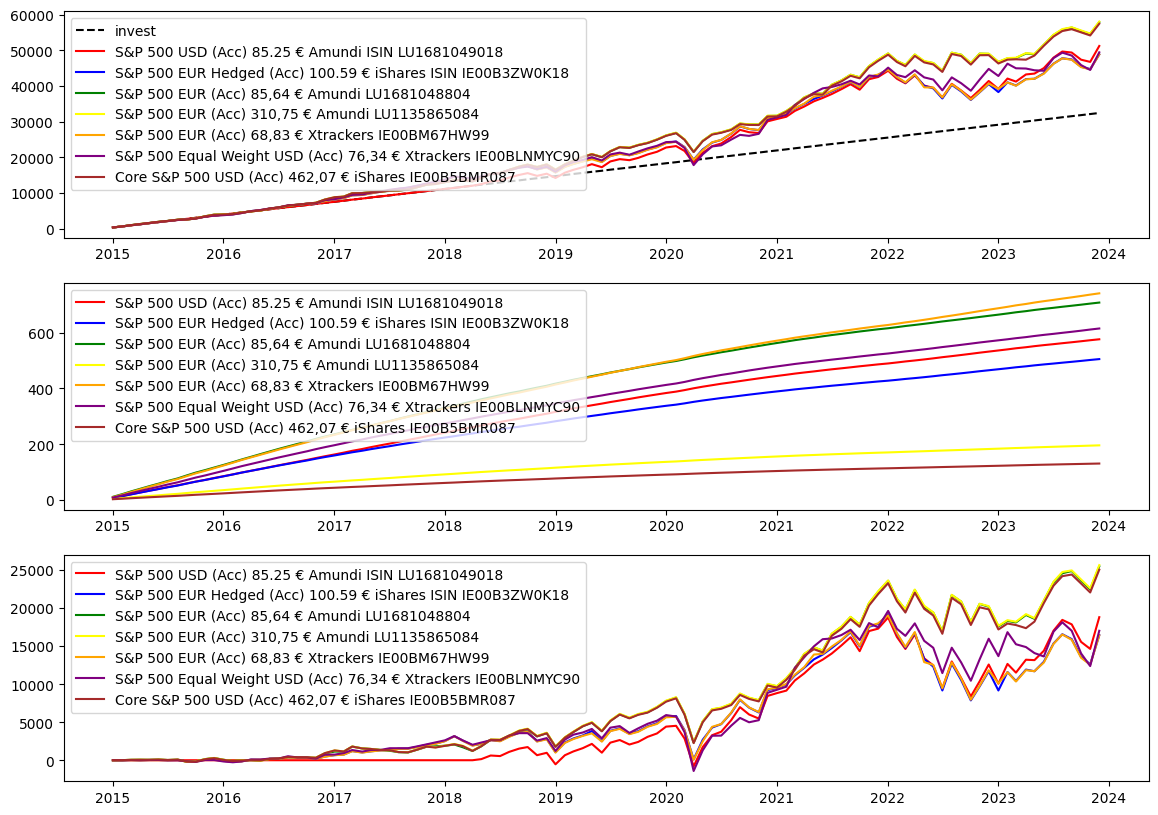

In [6]:
plt.figure(figsize=(14,10))

# 첫 번째 subplot
plt.subplot(311)
plt.plot(df_all.index, df_all.invest, '--', label='invest', color='black')
for i in range(len(ticker)):
  plt.plot(df_all.index, df_all[ticker_price[i]], label=SP500_label[i], color=line_color[i])
# plt.plot(df_all.index, df_all[ticker_price[0]], label=SP500_label[0], color=line_color[0])
# plt.plot(df_all.index, df_all[ticker_price[1]], label=SP500_label[1], color='green')
# plt.plot(df_all.index, df_all[ticker_price[2]], label=SP500_label[2], color='red')
# plt.plot(df_all.index, df_all[ticker_price[3]], label=SP500_label[3], color='purple')
# plt.plot(df_all.index, df_all[ticker_price[4]], label=SP500_label[4], color='orange')
plt.legend()

# 두 번째 subplot
plt.subplot(312)
for i in range(len(ticker)):
  plt.plot(df_all.index, df_all[ticker_cum_num[i]], label=SP500_label[i], color=line_color[i])
# plt.plot(df_all.index, df_all[ticker_cum_num[0]], label=SP500_label[0], color='blue')
# plt.plot(df_all.index, df_all[ticker_cum_num[1]], label=SP500_label[1], color='green')
# plt.plot(df_all.index, df_all[ticker_cum_num[2]], label=SP500_label[2], color='red')
# plt.plot(df_all.index, df_all[ticker_cum_num[3]], label=SP500_label[3], color='purple')
# plt.plot(df_all.index, df_all[ticker_cum_num[4]], label=SP500_label[4], color='orange')
plt.legend()

# 세 번째 subplot
plt.subplot(313)
for i in range(len(ticker)):
  plt.plot(df_all.index, df_all[ticker_ret[i]], label=SP500_label[i], color=line_color[i])
# plt.plot(df_all.index, df_all[ticker_ret[0]], label=SP500_label[0], color='blue')
# plt.plot(df_all.index, df_all[ticker_ret[1]], label=SP500_label[1], color='green')
# plt.plot(df_all.index, df_all[ticker_ret[2]], label=SP500_label[2], color='red')
# plt.plot(df_all.index, df_all[ticker_ret[3]], label=SP500_label[3], color='purple')
#plt.plot(df_all.index, df_all.LU1681038243_ret, label='NASDAQ 100 EUR (Acc) Amundi', color='orange')

plt.legend()
plt.show()


In [7]:
"""
S&P 500 USD (Acc) 85.25 € Amundi ISIN LU1681049018
x  S&P 500 USD (Acc) 41.47 € HSBC ISIN IE000JZ473P7 -- 2022년부터
S&P 500 EUR Hedged (Acc) 100.59 € iShares ISIN IE00B3ZW0K18
S&P 500 EUR (Acc) 85,64 € Amundi LU1681048804
S&P 500 EUR (Acc) 310,75 € Amundi LU1135865084
S&P 500 EUR (Acc) 68,83 € Xtrackers IE00BM67HW99
x  S&P 500 EUR (Acc) 15,82 € BNP Paribas FR0013041530
S&P 500 Equal Weight USD (Acc) 76,34 € Xtrackers IE00BLNMYC90
Core S&P 500 USD (Acc) 462,07 € iShares IE00B5BMR087

"""
SP500_label = ['S&P 500 EUR (Acc) 85,64 € Amundi LU1681048804',
               'S&P 500 EUR (Acc) 310,75 € Amundi LU1135865084',
               'Core S&P 500 USD (Acc) 462,07 € iShares IE00B5BMR087']

ticker = ['LU1681048804', 'LU1135865084','IE00B5BMR087']
start_date = '2015-01-01'
end_date = '2023-12-31'
monthly_invest = 300

df_all = pd.DataFrame()

for t in ticker:
  close_prices = get_monthly_first_business_day_data(t, start_date, end_date)
  if df_all.empty:
    df_all = pd.DataFrame({t: close_prices.values}, index=close_prices.index)
    df_all['invest'] = range(monthly_invest, monthly_invest *(len(df_all)+1), monthly_invest)
  else:
    df_all[t] = close_prices.values

  df_all[t+'_num'] = monthly_invest / df_all[t]
  df_all[t+'_cum_num'] = df_all[t+'_num'].cumsum()
  df_all[t+'_price'] = df_all[t+'_cum_num'] * df_all[t]
  df_all[t+'_ret'] = df_all[t+'_price'] - df_all['invest']

[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


In [8]:
df_all.head()

,LU1681048804,invest,LU1681048804_num,LU1681048804_cum_num,LU1681048804_price,LU1681048804_ret,LU1135865084,LU1135865084_num,LU1135865084_cum_num,LU1135865084_price,LU1135865084_ret,IE00B5BMR087,IE00B5BMR087_num,IE00B5BMR087_cum_num,IE00B5BMR087_price,IE00B5BMR087_ret
2015-01-01,28.647800,300,10.472008,10.472008,300.000000,0.000000,103.296204,2.904269,2.904269,300.000000,0.000000,155.830002,1.925175,1.925175,300.000000,0.000000
2015-02-02,29.853399,600,10.049107,20.521115,612.625041,12.625041,107.659302,2.786568,5.690838,612.671612,12.671612,161.679993,1.855517,3.780692,611.262255,11.262255
2015-03-02,31.750200,900,9.448759,29.969874,951.549512,51.549512,114.515404,2.619735,8.310573,951.688576,51.688576,173.039993,1.733703,5.514395,954.210919,54.210919
2015-04-01,32.181099,1200,9.322242,39.292117,1264.463491,64.463491,116.086700,2.584275,10.894848,1264.746951,64.746951,175.279999,1.711547,7.225943,1266.563194,66.563194
2015-05-01,31.866501,1500,9.414275,48.706392,1552.102267,52.102267,114.971497,2.609342,13.504190,1552.596975,52.596975,174.369995,1.720479,8.946422,1559.987560,59.987560


In [11]:
ticker_price = [t + "_price" for t in ticker]
ticker_cum_num = [t + "_cum_num" for t in ticker]
ticker_ret = [t + "_ret" for t in ticker]

line_color = [
              'red',
              'blue',
              'green',
              'yellow',
              'orange',
              'purple',
              'brown',
              'pink',
              'gray',
              'cyan',
              'magenta',
              'maroon',
              'lime'
]

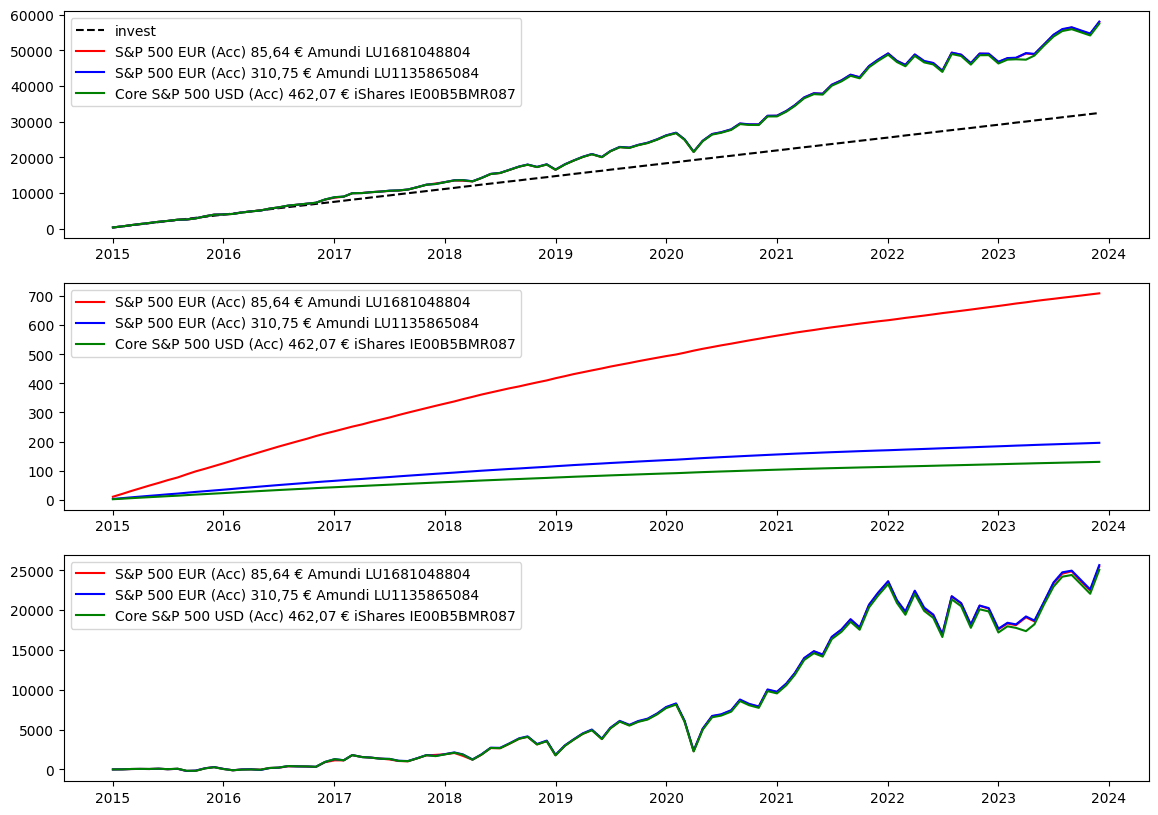

In [12]:
plt.figure(figsize=(14,10))

# 첫 번째 subplot
plt.subplot(311)
plt.plot(df_all.index, df_all.invest, '--', label='invest', color='black')
for i in range(len(ticker)):
  plt.plot(df_all.index, df_all[ticker_price[i]], label=SP500_label[i], color=line_color[i])
# plt.plot(df_all.index, df_all[ticker_price[0]], label=SP500_label[0], color=line_color[0])
# plt.plot(df_all.index, df_all[ticker_price[1]], label=SP500_label[1], color='green')
# plt.plot(df_all.index, df_all[ticker_price[2]], label=SP500_label[2], color='red')
# plt.plot(df_all.index, df_all[ticker_price[3]], label=SP500_label[3], color='purple')
# plt.plot(df_all.index, df_all[ticker_price[4]], label=SP500_label[4], color='orange')
plt.legend()

# 두 번째 subplot
plt.subplot(312)
for i in range(len(ticker)):
  plt.plot(df_all.index, df_all[ticker_cum_num[i]], label=SP500_label[i], color=line_color[i])
# plt.plot(df_all.index, df_all[ticker_cum_num[0]], label=SP500_label[0], color='blue')
# plt.plot(df_all.index, df_all[ticker_cum_num[1]], label=SP500_label[1], color='green')
# plt.plot(df_all.index, df_all[ticker_cum_num[2]], label=SP500_label[2], color='red')
# plt.plot(df_all.index, df_all[ticker_cum_num[3]], label=SP500_label[3], color='purple')
# plt.plot(df_all.index, df_all[ticker_cum_num[4]], label=SP500_label[4], color='orange')
plt.legend()

# 세 번째 subplot
plt.subplot(313)
for i in range(len(ticker)):
  plt.plot(df_all.index, df_all[ticker_ret[i]], label=SP500_label[i], color=line_color[i])
# plt.plot(df_all.index, df_all[ticker_ret[0]], label=SP500_label[0], color='blue')
# plt.plot(df_all.index, df_all[ticker_ret[1]], label=SP500_label[1], color='green')
# plt.plot(df_all.index, df_all[ticker_ret[2]], label=SP500_label[2], color='red')
# plt.plot(df_all.index, df_all[ticker_ret[3]], label=SP500_label[3], color='purple')
#plt.plot(df_all.index, df_all.LU1681038243_ret, label='NASDAQ 100 EUR (Acc) Amundi', color='orange')

plt.legend()
plt.show()


In [26]:
def get_monthly_mid_business_day_data(ticker, start_date, end_date):
    try:
        # Get stock data
        stock_data = yf.download(ticker, start=start_date, end=end_date)

        # Get the first business day of each month
        first_business_days = pd.date_range(start=start_date, end=end_date, freq=BMonthBegin())

        # Find the closest business day to the middle of the month
        mid_business_days = [day + BDay(15) if day.day <= 15 else day + BDay(1) for day in first_business_days]

        # Get the adjusted close prices for the middle business days
        monthly_close_prices = []
        for date in mid_business_days:
            # Check if the date is in the stock data
            if date in stock_data.index:
                monthly_close_prices.append(stock_data.loc[date]['Adj Close'])
            else:
                # If not, find the next available business day
                next_business_day = date + BDay(1)
                while next_business_day not in stock_data.index:
                    next_business_day += BDay(1)
                monthly_close_prices.append(stock_data.loc[next_business_day]['Adj Close'])

        return pd.Series(monthly_close_prices, index=mid_business_days)

    except Exception as e:
        print(f"Error fetching data: {e}")
        return pd.Series([])

In [32]:
# 사용 예시
ticker = 'IE00B5BMR087'
start_date = '2015-01-01'
end_date = '2023-12-31'
monthly_invest = 300

monthly_mid_close_prices = get_monthly_mid_business_day_data(ticker, start_date, end_date)
monthly_first_close_prices = get_monthly_first_business_day_data(ticker, start_date, end_date)

[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


In [31]:
df_mid = pd.DataFrame({t: monthly_mid_close_prices.values}, index=monthly_mid_close_prices.index)
df_mid['invest'] = range(monthly_invest, monthly_invest *(len(df_all)+1), monthly_invest)
df_mid[ticker+'_num'] = monthly_invest / df_mid[ticker]
df_mid[ticker+'_cum_num'] = df_mid[ticker+'_num'].cumsum()
df_mid[ticker+'_price'] = df_mid[ticker+'_cum_num'] * df_mid[ticker]
df_mid[ticker+'_ret'] = df_mid[ticker+'_price'] - df_mid['invest']
df_mid.head()

,IE00B5BMR087,invest,IE00B5BMR087_num,IE00B5BMR087_cum_num,IE00B5BMR087_price,IE00B5BMR087_ret
2015-01-22,164.199997,300,1.827040,1.827040,300.000000,0.000000
2015-02-23,170.119995,600,1.763461,3.590501,610.816075,10.816075
2015-03-23,176.949997,900,1.695394,5.285896,935.339206,35.339206
2015-04-22,179.929993,1200,1.667315,6.953211,1251.091152,51.091152
2015-05-22,177.369995,1500,1.691380,8.644590,1533.290949,33.290949


In [33]:
df_first = pd.DataFrame({t: monthly_first_close_prices.values}, index=monthly_first_close_prices.index)
df_first['invest'] = range(monthly_invest, monthly_invest *(len(df_all)+1), monthly_invest)
df_first[ticker+'_num'] = monthly_invest / df_first[ticker]
df_first[ticker+'_cum_num'] = df_first[ticker+'_num'].cumsum()
df_first[ticker+'_price'] = df_first[ticker+'_cum_num'] * df_first[ticker]
df_first[ticker+'_ret'] = df_first[ticker+'_price'] - df_first['invest']
df_first.head()

,IE00B5BMR087,invest,IE00B5BMR087_num,IE00B5BMR087_cum_num,IE00B5BMR087_price,IE00B5BMR087_ret
2015-01-01,155.830002,300,1.925175,1.925175,300.000000,0.000000
2015-02-02,161.679993,600,1.855517,3.780692,611.262255,11.262255
2015-03-02,173.039993,900,1.733703,5.514395,954.210919,54.210919
2015-04-01,175.279999,1200,1.711547,7.225943,1266.563194,66.563194
2015-05-01,174.369995,1500,1.720479,8.946422,1559.987560,59.987560


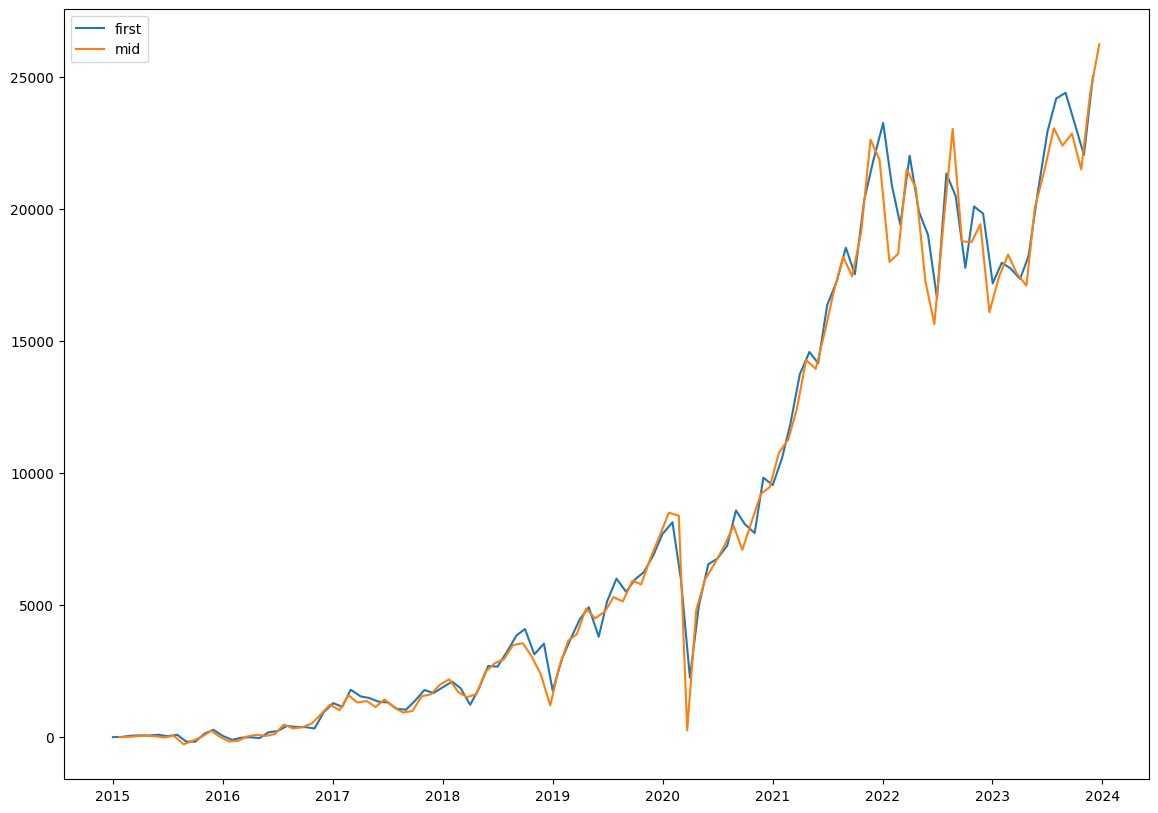

In [38]:
plt.figure(figsize=(14,10))
plt.plot(df_first.index, df_first[ticker+'_ret'], label='first')
plt.plot(df_mid.index, df_mid[ticker+'_ret'], label='mid')
plt.legend()
plt.show()